In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import os

In [5]:
import cv2
import imghdr

In [6]:
data_dir='Data'

In [7]:
image_exts= ["jpeg",'jpg','bmp','png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 172 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()


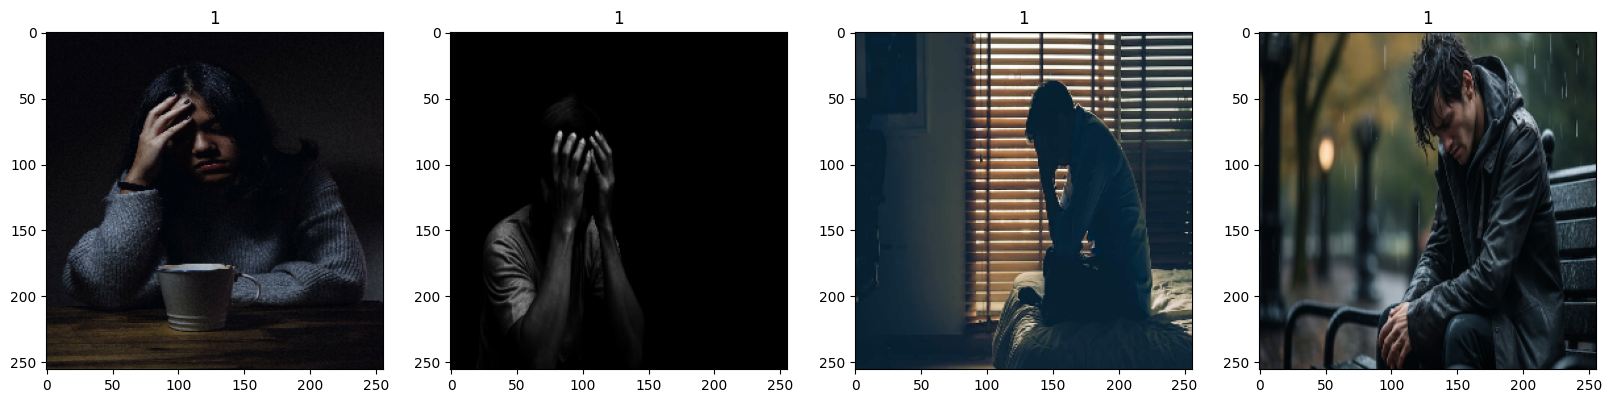

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data= data.map(lambda x,y:(x/255,y))

In [15]:
len(data)

6

In [16]:
data.as_numpy_iterator().next()


(array([[[[0.13347887, 0.18838082, 0.18838082],
          [0.14089274, 0.1957947 , 0.1957947 ],
          [0.1462546 , 0.20115656, 0.20115656],
          ...,
          [0.1876685 , 0.2504136 , 0.24649203],
          [0.20022212, 0.26296723, 0.25904566],
          [0.21467525, 0.27742034, 0.27349877]],
 
         [[0.13914675, 0.19404872, 0.19404872],
          [0.14985546, 0.20475742, 0.20475742],
          [0.16266851, 0.21757047, 0.21757047],
          ...,
          [0.20046887, 0.26321396, 0.2592924 ],
          [0.20872396, 0.27146906, 0.2675475 ],
          [0.2168971 , 0.2796422 , 0.2748175 ]],
 
         [[0.14996937, 0.20487133, 0.20487133],
          [0.1627451 , 0.21764706, 0.21764706],
          [0.17616951, 0.23107147, 0.23107147],
          ...,
          [0.21192555, 0.27467066, 0.2707491 ],
          [0.2180913 , 0.2808364 , 0.27691483],
          [0.2180913 , 0.2808364 , 0.271538  ]],
 
         ...,
 
         [[0.30445972, 0.19857737, 0.12406757],
          [0.27541

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1


In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
len(test)

1

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
logdir='logs'

In [52]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [53]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 0.4979 - loss: 0.7731 - val_accuracy: 0.6250 - val_loss: 0.6726
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step - accuracy: 0.5844 - loss: 0.6837 - val_accuracy: 0.5000 - val_loss: 0.6156
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - accuracy: 0.6115 - loss: 0.5891 - val_accuracy: 0.8750 - val_loss: 0.5747
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.7979 - loss: 0.6053 - val_accuracy: 0.9062 - val_loss: 0.4928
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.7260 - loss: 0.5085 - val_accuracy: 0.7188 - val_loss: 0.4511
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step - accuracy: 0.8313 - loss: 0.3946 - val_accuracy: 0.9062 - val_loss: 0.3314
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - accuracy: 0.8521 - loss: 0.3456 - val_accuracy: 0.9062 - val_loss: 0.2532
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 438ms/step - accuracy: 0.8729 - loss: 0.2954 - val_accuracy: 0.9688 - val_loss:

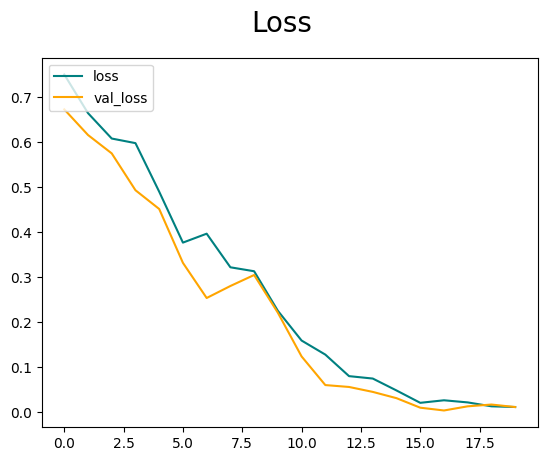

In [54]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

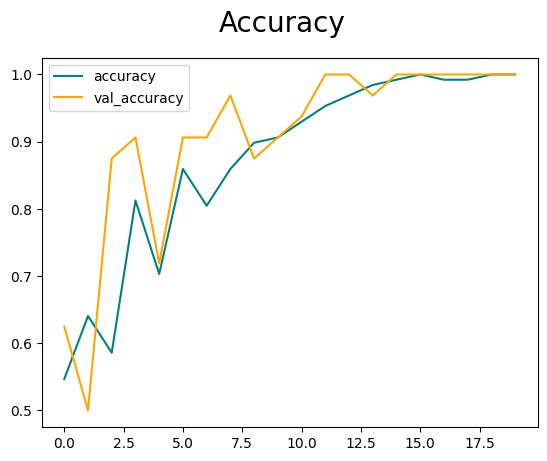

In [55]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [56]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [57]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [58]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [59]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


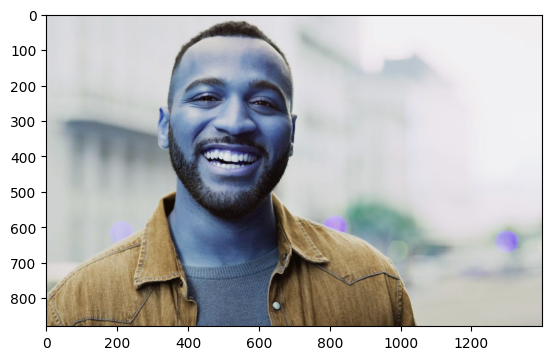

In [60]:
img = cv2.imread('happytest.jpg')
plt.imshow(img)
plt.show()

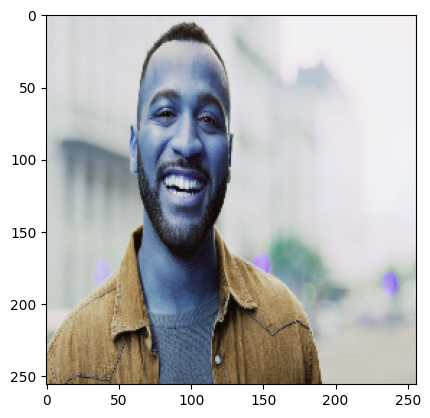

In [61]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [63]:
yhat


array([[0.3602407]], dtype=float32)

In [64]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


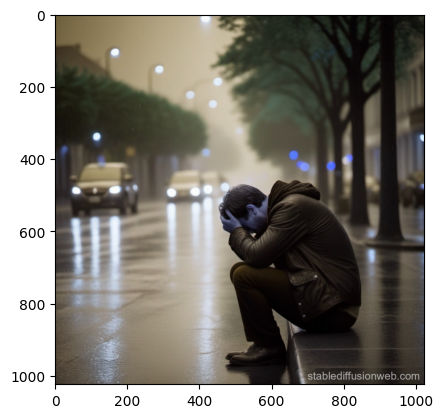

In [65]:
img = cv2.imread('sadtest.jpg')
plt.imshow(img)
plt.show()

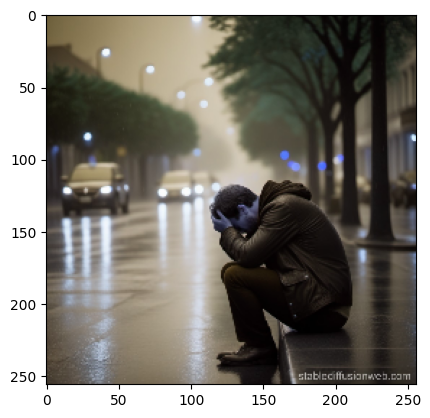

In [66]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [68]:
yhat

array([[0.9804321]], dtype=float32)

In [69]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [73]:
from tensorflow.keras.models import load_model

In [74]:
model.save(os.path.join('models','imageclassifier.h5'))

new_model = load_model('models/imageclassifier.h5')

In [75]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined